In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model

from sklearn.preprocessing import MinMaxScaler

2024-02-15 13:59:23.929735: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-02-15 13:59:24.324423: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-02-15 13:59:24.365316: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-02-15 13:59:24.365346: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore 

In [3]:
# Load the data
data = pd.read_csv("train.csv")

# Separate the features and the target
X, Y = data.drop(['fraude', 'index'], axis=1), data["fraude"]

In [4]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [5]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=100, stratify=Y)

In [6]:
X_train = X_train[Y_train == 0]
Y_train = Y_train[Y_train == 0]

In [7]:
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,1.323412e-03,0.932854,0.754335,0.858886,0.141597,0.764935,0.263269,0.257533,0.792628,0.384445,...,0.505091,0.579391,0.562539,0.510866,0.660404,0.200420,0.658169,0.417139,0.415896,0.309741
1,3.948362e-02,0.965461,0.722904,0.777817,0.217189,0.756171,0.250014,0.273127,0.776591,0.380593,...,0.558451,0.596472,0.573937,0.530729,0.650243,0.405161,0.642516,0.457578,0.411583,0.314657
2,6.905099e-04,0.977288,0.769589,0.843609,0.296818,0.764717,0.260134,0.265672,0.785841,0.453178,...,0.523538,0.578653,0.563526,0.527500,0.664436,0.413777,0.662590,0.374887,0.416943,0.313345
3,1.140470e-03,0.979214,0.766224,0.844877,0.243004,0.763527,0.262026,0.263530,0.785499,0.463493,...,0.606930,0.581263,0.558740,0.484952,0.665529,0.323621,0.636172,0.563819,0.415313,0.313178
4,4.670867e-04,0.947285,0.777118,0.871423,0.277777,0.767984,0.267136,0.268093,0.788543,0.432049,...,0.616434,0.580639,0.558900,0.483704,0.663534,0.332956,0.631445,0.342536,0.418214,0.314561
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179113,8.551580e-04,0.949663,0.772069,0.840084,0.215231,0.782978,0.300848,0.266146,0.796110,0.461542,...,0.554871,0.580031,0.561359,0.508693,0.662261,0.517642,0.640753,0.347291,0.419187,0.315943
179114,3.892389e-07,0.927943,0.781568,0.875481,0.290424,0.759752,0.271235,0.260243,0.786296,0.467051,...,0.603430,0.577880,0.575698,0.513624,0.664917,0.407675,0.638955,0.382286,0.414293,0.315083
179115,5.276640e-02,0.924543,0.774880,0.819654,0.311461,0.723372,0.298371,0.306877,0.771727,0.450801,...,0.572898,0.565964,0.552269,0.552123,0.666116,0.456177,0.627798,0.410768,0.447430,0.307147
179116,3.464227e-05,0.979748,0.779789,0.804080,0.311455,0.774104,0.252490,0.269112,0.783733,0.443397,...,0.545986,0.579884,0.557936,0.482408,0.660739,0.269358,0.685177,0.386648,0.417089,0.314689


In [8]:
class AnomalyDetector(Model):
  def __init__(self):
    super(AnomalyDetector, self).__init__()
    self.encoder = tf.keras.Sequential([
      layers.Dense(29, activation="relu"),
      layers.Dense(16, activation="relu"),
      layers.Dense(8, activation="relu")])

    self.decoder = tf.keras.Sequential([
      layers.Dense(16, activation="relu"),
      layers.Dense(32, activation="relu"),
      layers.Dense(29, activation="sigmoid")])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

autoencoder = AnomalyDetector()

2024-02-15 13:59:37.282630: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2024-02-15 13:59:37.283341: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2024-02-15 13:59:37.283361: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (adampc): /proc/driver/nvidia/version does not exist
2024-02-15 13:59:37.284130: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [9]:
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

In [10]:
autoencoder.fit(X_train, X_train,
                epochs=5,
                shuffle=True,
                validation_data=(X_test, X_test))

Epoch 1/5
5598/5598 [==============================] - 12s 2ms/step - loss: 0.0016 - val_loss: 9.8569e-04
Epoch 2/5
5598/5598 [==============================] - 10s 2ms/step - loss: 8.8090e-04 - val_loss: 8.8033e-04
Epoch 3/5
5598/5598 [==============================] - 11s 2ms/step - loss: 8.2842e-04 - val_loss: 8.4295e-04
Epoch 4/5
5598/5598 [==============================] - 9s 2ms/step - loss: 7.0224e-04 - val_loss: 6.9154e-04
Epoch 5/5
5598/5598 [==============================] - 8s 1ms/step - loss: 6.5295e-04 - val_loss: 6.7795e-04


In [11]:
X_test_pred = autoencoder.predict(X_test)
mse = np.mean(np.power(X_test - X_test_pred, 2), axis=1)

2404/2404 [==============================] - 2s 788us/step


In [12]:
pd.DataFrame(X_test_pred)

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,0.002271,0.961942,0.772007,0.839828,0.247372,0.765238,0.260014,0.265405,0.785584,0.463305,...,0.569506,0.578281,0.559857,0.509724,0.667354,0.279650,0.630061,0.490007,0.415167,0.313357
1,0.003087,0.962429,0.780996,0.856329,0.344834,0.766608,0.269660,0.262473,0.786191,0.498897,...,0.541943,0.574465,0.556903,0.525324,0.672810,0.475573,0.646625,0.424375,0.416487,0.314556
2,0.000646,0.953265,0.767911,0.835755,0.192403,0.765113,0.264750,0.264438,0.785430,0.448976,...,0.592938,0.579182,0.559030,0.512150,0.667213,0.373234,0.626931,0.519022,0.413774,0.314505
3,0.006255,0.954442,0.768183,0.850321,0.433357,0.767764,0.264117,0.264153,0.783440,0.441858,...,0.532800,0.577709,0.558635,0.513721,0.665964,0.365863,0.629924,0.441560,0.414636,0.313469
4,0.001765,0.959157,0.768486,0.834957,0.247452,0.765939,0.262987,0.264994,0.784960,0.463355,...,0.598618,0.578278,0.560657,0.521819,0.666048,0.430011,0.627598,0.359434,0.414239,0.312920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76893,0.000830,0.954239,0.770283,0.843226,0.196929,0.765930,0.265150,0.262573,0.783647,0.515560,...,0.560918,0.578740,0.557788,0.514435,0.666899,0.399313,0.632144,0.365362,0.415613,0.313189
76894,0.001378,0.953192,0.768445,0.838449,0.190895,0.763986,0.262476,0.264057,0.785353,0.454995,...,0.564394,0.578549,0.560240,0.513855,0.665414,0.296691,0.632306,0.374601,0.415305,0.313803
76895,0.001395,0.951152,0.769079,0.837335,0.183032,0.764403,0.263786,0.263490,0.785446,0.450181,...,0.554175,0.578776,0.560221,0.516119,0.665377,0.357578,0.632578,0.425030,0.415473,0.314010
76896,0.008760,0.961845,0.770126,0.840964,0.297954,0.765579,0.260709,0.265768,0.782691,0.467029,...,0.532520,0.578859,0.559968,0.510432,0.667322,0.485873,0.625236,0.357425,0.413601,0.314315


In [13]:
print(f'Average reconstruction error (train): {np.mean(mse)}')

Average reconstruction error (train): 0.0006779520437727218


Text(0, 0.5, 'Frequency')

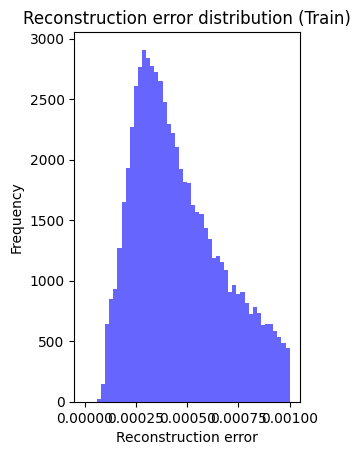

In [14]:
plt.subplot(1, 2, 1)
plt.hist(mse, bins=50, alpha=0.6,range=(0,0.001), color='blue')
plt.title('Reconstruction error distribution (Train)')
plt.xlabel('Reconstruction error')
plt.ylabel('Frequency')

In [15]:
thresholds = np.linspace(0, 0.1, 100)
f1_scores = []
for thresh in thresholds:
    preds = [1 if e > thresh else 0 for e in mse]
    f1 = f1_score(Y_test, preds)
    f1_scores.append(f1)

In [16]:
max_f1 = max(f1_scores)
max_f1_threshold = thresholds[f1_scores.index(max_f1)]

In [17]:
max_f1_threshold

0.012121212121212121

In [18]:
mse

array([0.00020803, 0.00121638, 0.00021242, ..., 0.00052159, 0.00021166,
       0.00087497])

In [19]:
predictions = [1 if e > max_f1_threshold else 0 for e in mse]

In [20]:
accuracy = accuracy_score(Y_test, predictions)
f1 = f1_score(Y_test, predictions)
precision = precision_score(Y_test, predictions)
recall = recall_score(Y_test, predictions)

print(f'Maximum F1 Score: {max_f1}')
print(f'Best Threshold: {max_f1_threshold}')
print(f'Accuracy: {accuracy}')
print(f'F1 Score: {f1}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')

Maximum F1 Score: 0.5493562231759656
Best Threshold: 0.012121212121212121
Accuracy: 0.998634554864886
F1 Score: 0.5493562231759656
Precision: 0.64
Recall: 0.48120300751879697


tests

In [21]:
testdf = pd.DataFrame(columns=["real","preds"])

In [22]:
testdf["real"] = Y_test

In [23]:
testdf["preds"] = predictions

In [25]:
testdf.to_excel("testdf.xlsx")

results

In [64]:
validation = pd.read_csv("test.csv")
validation.drop(columns=["index"],inplace=True)

In [66]:
validation = scaler.transform(validation)

In [69]:
returnPreds = autoencoder.predict(validation)

891/891 [==============================] - 6s 6ms/step


In [72]:
mse = np.mean(np.power(validation - returnPreds, 2), axis=1)

In [74]:
predictions = [1 if e > max_f1_threshold else 0 for e in mse]

In [75]:
returnDf = pd.DataFrame("")

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
